# A trivial classification example using a Gaussian Naive Bayes
A dataset with two features to classify whether a person is Male or Female.

*Costas Andreopoulos \<c.andreopoulos@cern.ch\>*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from IPython.display import display, HTML

**Sample dataset**

\{Height (in cm), Weight (in kg)\} $\rightarrow$ Class (0 = Female, 1 = Male)

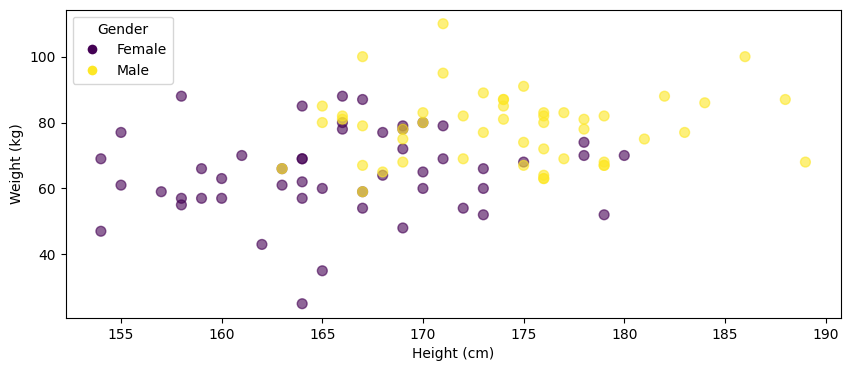

In [2]:
np.random.seed(42)  # For reproducibility

n_f = 50 # number of females
n_m = 50 # number of males
height_mean_f   = 168
height_std_f    =   7
weight_mean_f   =  65
weight_std_f    =  15
height_mean_m   = 175
height_std_m    =   6
weight_mean_m   =  78
weight_std_m    =  12

heights_f = np.random.normal(loc=height_mean_f, scale=height_std_f, size=n_f).astype(int)  
weights_f = np.random.normal(loc=weight_mean_f, scale=weight_std_f, size=n_f).astype(int)
heights_m = np.random.normal(loc=height_mean_m, scale=height_std_m, size=n_m).astype(int)  
weights_m = np.random.normal(loc=weight_mean_m, scale=weight_std_m, size=n_m).astype(int)

# Stack features into arrays with shape (n_f,2) and (n_m, 2) and then merge to a single (n_m+n_f,2) array
X_f = np.column_stack((heights_f, weights_f)) # stack  the input 1D arrays side by side, so each input array becomes a column
X_m = np.column_stack((heights_m, weights_m))
X   = np.vstack((X_f, X_m)) # stack vertically (row wise)

# Create label arrays (0 = Female, 1 = Male) and then merge
Y_f = np.zeros(n_f, dtype=int)
Y_m = np.ones (n_m, dtype=int)
Y   = np.concatenate((Y_f, Y_m))

# Plot
plt.figure(figsize=(10,4))
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='viridis', s=50, alpha=0.6)
# Add legend manually, since the above colored points based on the true label and doesn't automatically create a legend
legend_labels = {0: "Female", 1: "Male"}  # Define class names
colors = [plt.cm.viridis(i / 1) for i in legend_labels]  # Extract colors from colormap
# plt.Line2D creates a fake scatter plot point for the legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label=legend_labels[i]) 
           for i, color in zip(legend_labels, colors)]
plt.legend(handles=handles, title="Gender")  # Manually passing legend handles
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.show()

**Split to training and test samples**

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

**Train Gaussian Naïve Bayes**

In [4]:
# Train Gaussian Naïve Bayes
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

print(f"Training samples per class: {gnb.class_count_}")
print(f"Prior probabilities for each class: {gnb.class_prior_}")
print(f"Mean of each feature for each class:\n {gnb.theta_}")
print(f"Variance of each feature for each class:\n {gnb.var_}")

Training samples per class: [33. 37.]
Prior probabilities for each class: [0.47142857 0.52857143]
Mean of each feature for each class:
 [[165.75757576  64.87878788]
 [174.43243243  79.32432432]]
Variance of each feature for each class:
 [[ 47.75941251 194.04591389]
 [ 37.54273213 123.3542734 ]]


**Make predictictions of the test set and evaluate accuracy**

In [5]:
# Predictions
Y_pred = gnb.predict(X_test)

# Accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 76.67%


In [7]:
# Take a closer look at the test set
probs = gnb.predict_proba(X_test) # Class probabilities for each sample in the test set
df = pd.DataFrame(X_test, columns=['Height','Weight'])
df['Label (True)']  = Y_test  
df['Label (Pred.)'] = Y_pred
df['Prob. (Label = 0)'] = probs[:,0]  
df['Prob. (Label = 1)'] = probs[:,1]
html = df.to_html(max_rows=40, max_cols=10)
display(HTML('<style> .dataframe {max-height: 700px; overflow-y: scroll; overflow-x: scroll; display: block; } </style>'))
display(HTML(df.to_html()))

,Height,Weight,Label (True),Label (Pred.),Prob. (Label = 0),Prob. (Label = 1)
0,177,83,1,1,0.076699,0.923301
1,170,80,1,1,0.273813,0.726187
2,179,67,1,1,0.195408,0.804592
3,162,43,0,0,0.996182,0.003818
4,157,59,0,0,0.987486,0.012514
5,169,72,0,1,0.477134,0.522866
6,168,64,0,0,0.728498,0.271502
7,165,85,1,1,0.451404,0.548596
8,164,57,0,0,0.943536,0.056464
9,171,69,0,1,0.449226,0.550774
